# Load data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/train.csv").drop('id', axis=1)

In [3]:
df.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [4]:
categorical_cols = ['Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
numerical_cols = df.columns.difference(categorical_cols + ['Depression'])

## Check class imbalance

In [5]:
df['Depression'].value_counts()

Depression
0    115133
1     25567
Name: count, dtype: int64

Classes are imbalanced with 5:1 ratio between not-depressed and depressed.

## Check for missing values

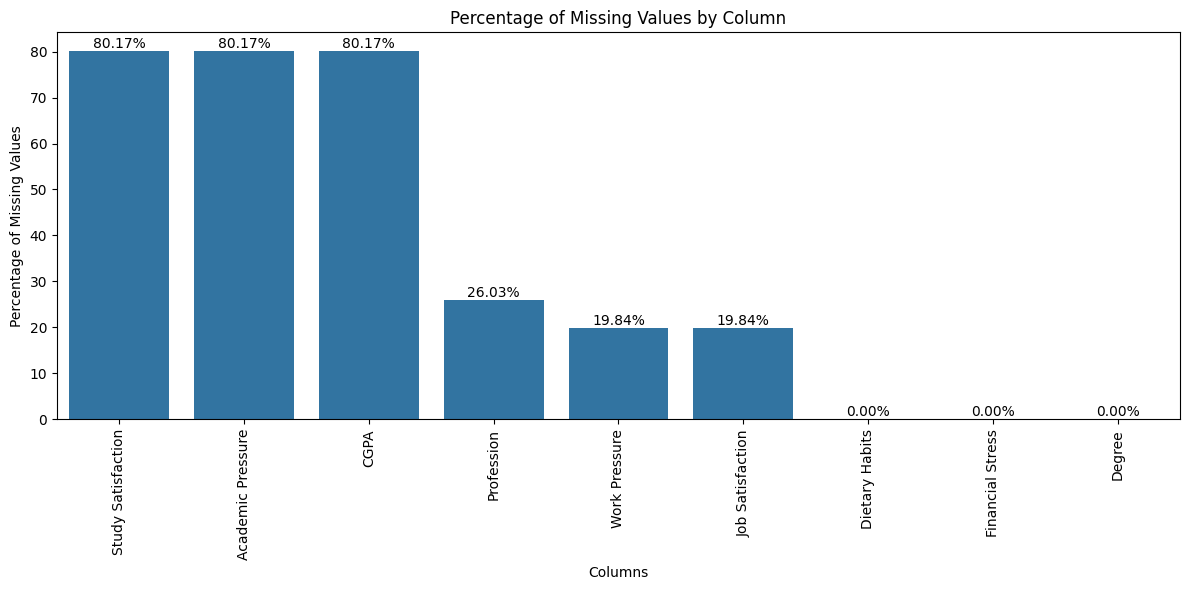

Study Satisfaction    80.172708
Academic Pressure     80.172708
CGPA                  80.171997
Profession            26.034115
Work Pressure         19.842217
Job Satisfaction      19.836532
Dietary Habits         0.002843
Financial Stress       0.002843
Degree                 0.001421
dtype: float64


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a DataFrame called 'df'
# If not, load your data first:
# df = pd.read_csv('your_data.csv')

# Calculate percentage of missing values
total_rows = len(df)
missing_percentage = (df.isnull().sum() / total_rows * 100).sort_values(ascending=False)

# Exclude columns with no missing values
missing_percentage = missing_percentage[missing_percentage > 0]

# If there are no columns with missing values, print a message and exit
if missing_percentage.empty:
    print("There are no columns with missing values.")
else:
    # Create a bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=missing_percentage.index, y=missing_percentage.values)

    # Customize the plot
    plt.title('Percentage of Missing Values by Column')
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Missing Values')
    plt.xticks(rotation=90)

    # Add percentage labels on top of each bar
    for i, v in enumerate(missing_percentage.values):
        plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

    # Print the percentages
    print(missing_percentage)

# Study column values

In [7]:
df['Study Satisfaction'].value_counts()

Study Satisfaction
4.0    6360
2.0    5840
3.0    5823
1.0    5451
5.0    4423
Name: count, dtype: int64

In [8]:
df['Academic Pressure'].value_counts()  

Academic Pressure
3.0    7463
5.0    6296
4.0    5158
1.0    4801
2.0    4179
Name: count, dtype: int64

## Fill missing values

In [9]:
# fill missing values
df[categorical_cols] = df[categorical_cols].fillna('Unknown')
df[numerical_cols] = df[numerical_cols].fillna(0)

In [10]:
X = df.drop('Depression', axis=1)
y = df['Depression']

In [11]:
df.shape, X.shape, y.shape

((140700, 19), (140700, 18), (140700,))

In [12]:
from sklearn.model_selection import train_test_split


X_encoded = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

In [14]:
print('Train accuracy: ', rf.score(X_train, y_train))
print('Test accuracy: ', rf.score(X_test, y_test))

Train accuracy:  0.9999822316986496
Test accuracy:  0.933546552949538


In [ ]:
y_pred = rf.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, accuracy_score

print(classification_report(y_test, y_pred))
print(f'F1 score: {f1_score(y_test, y_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_pred):.4f}')
print(f'Recall: {recall_score(y_test, y_pred):.4f}')
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     22986
           1       0.85      0.77      0.81      5154

    accuracy                           0.93     28140
   macro avg       0.90      0.87      0.88     28140
weighted avg       0.93      0.93      0.93     28140

F1 score: 0.8095
Precision: 0.8521
Recall: 0.7711
Accuracy: 0.9335


Model is overfitting. 

# Fix overfitting

## Oversampling minority class

In [16]:
# Oversampling minority class
from imblearn.over_sampling import SMOTE, RandomOverSampler
# SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE()
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

X_train, y_train = smote.fit_resample(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
print('Train accuracy: ', rf.score(X_train, y_train))
print('Test accuracy: ', rf.score(X_test, y_test))

Train accuracy:  1.0
Test accuracy:  0.9351101634683724


In [20]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, accuracy_score

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(f'F1 score: {f1_score(y_test, y_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_pred):.4f}')
print(f'Recall: {recall_score(y_test, y_pred):.4f}')
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22986
           1       0.83      0.81      0.82      5154

    accuracy                           0.94     28140
   macro avg       0.89      0.89      0.89     28140
weighted avg       0.93      0.94      0.93     28140

F1 score: 0.8213
Precision: 0.8285
Recall: 0.8143
Accuracy: 0.9351


## Downsampling majority class

In [21]:
# Undersampling majority class
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

X_train, y_train = rus.fit_resample(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [22]:
print('Train accuracy: ', rf.score(X_train, y_train))
print('Test accuracy: ', rf.score(X_test, y_test))

Train accuracy:  1.0
Test accuracy:  0.9137526652452026


In [33]:
print(classification_report(y_test, y_pred))
print(f'F1 score: {f1_score(y_test, y_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_pred):.4f}')
print(f'Recall: {recall_score(y_test, y_pred):.4f}')
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      5084
           1       0.91      0.92      0.91      5143

    accuracy                           0.91     10227
   macro avg       0.91      0.91      0.91     10227
weighted avg       0.91      0.91      0.91     10227

F1 score: 0.9138
Precision: 0.9082
Recall: 0.9195
Accuracy: 0.9128


## Balanced learning

In [34]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier()

X_encoded = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

brf.fit(X_train, y_train)
y_pred = brf.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'F1 score: {f1_score(y_test, y_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_pred):.4f}')
print(f'Recall: {recall_score(y_test, y_pred):.4f}')
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

/Users/hieu/miniconda3/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/hieu/miniconda3/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/Users/hieu/miniconda3/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behavi

              precision    recall  f1-score   support

           0       0.98      0.91      0.94     22986
           1       0.69      0.92      0.79      5154

    accuracy                           0.91     28140
   macro avg       0.84      0.92      0.87     28140
weighted avg       0.93      0.91      0.92     28140

F1 score: 0.7914
Precision: 0.6922
Recall: 0.9237
Accuracy: 0.9108


## Logistic regression

In [35]:
# Class weights
from sklearn.linear_model import LogisticRegression
class_weights = {0: 1, 1: 5}  # Give more weight to minority class
clf = LogisticRegression(class_weight=class_weights)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'F1 score: {f1_score(y_test, y_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_pred):.4f}')
print(f'Recall: {recall_score(y_test, y_pred):.4f}')
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

/Users/hieu/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.98      0.91      0.95     22986
           1       0.70      0.94      0.80      5154

    accuracy                           0.91     28140
   macro avg       0.84      0.92      0.87     28140
weighted avg       0.93      0.91      0.92     28140

F1 score: 0.7991
Precision: 0.6964
Recall: 0.9373
Accuracy: 0.9137


# Submission

In [24]:
# Oversampling minority class
from imblearn.over_sampling import SMOTE, RandomOverSampler
# SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE()

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
test_df = pd.read_csv('./data/test.csv').drop('id', axis=1)
test_df[categorical_cols] = test_df[categorical_cols].fillna('Unknown')
test_df[numerical_cols] = test_df[numerical_cols].fillna(0)

rf.predict(pd.get_dummies(test_df))

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- City_Abhinav
- City_Aditi
- City_Avni
- City_Chemist
- City_Ghopal
- ...
Feature names seen at fit time, yet now missing:
- City_3.0
- City_Aaradhya
- City_Aditya
- City_Aishwarya
- City_Anvi
- ...


In [28]:
X_encoded.shape, pd.get_dummies(test_df).shape

((140700, 777), (93800, 665))

We have encountered a problem of city names unseen at fit time.

In [29]:
cities_train = X['City'].unique()
cities_test = test_df['City'].unique()

In [30]:
# show cities in test that is not in train

print(list(set(cities_test) - set(cities_train)))

['More Delhi', 'Leela', 'No.12', 'Ghopal', 'Less than 5 hours', 'Hrithik', 'Vikram', 'Chemist', 'Malyan', 'San Vasai-Virar', 'Siddhesh', 'Avni', 'Abhinav', 'Is Kanpur', 'Vaikot', 'Ira', 'Thani', 'Sara', 'Lawyer', 'Aditi', 'Unaly', 'Rolkata', 'Mhopal', 'Golkata', 'Saurav', 'Pratham']


This means we have to encode cities using label encoder.

In [31]:
df[categorical_cols]

,Gender,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
0,Female,Ludhiana,Working Professional,Chef,More than 8 hours,Healthy,BHM,No,No
1,Male,Varanasi,Working Professional,Teacher,Less than 5 hours,Unhealthy,LLB,Yes,No
2,Male,Visakhapatnam,Student,Unknown,5-6 hours,Healthy,B.Pharm,Yes,No
3,Male,Mumbai,Working Professional,Teacher,Less than 5 hours,Moderate,BBA,Yes,Yes
4,Female,Kanpur,Working Professional,Business Analyst,5-6 hours,Unhealthy,BBA,Yes,Yes
...,...,...,...,...,...,...,...,...,...
140695,Female,Ahmedabad,Working Professional,Unknown,5-6 hours,Unhealthy,Class 12,No,Yes
140696,Female,Hyderabad,Working Professional,Content Writer,7-8 hours,Moderate,B.Tech,Yes,Yes
140697,Female,Kolkata,Working Professional,Marketing Manager,More than 8 hours,Moderate,B.Com,No,No
140698,Female,Srinagar,Working Professional,Plumber,5-6 hours,Moderate,ME,Yes,No


In [32]:
df['Working Professional or Student'].value_counts()

Working Professional or Student
Working Professional    112799
Student                  27901
Name: count, dtype: int64

In [33]:
print(f'{len(df['Profession'].unique())} professions in total')
print('Top 10 professions:')
print(df['Profession'].value_counts().head(10))

65 professions in total
Top 10 professions:
Profession
Unknown             36630
Teacher             24906
Content Writer       7814
Architect            4370
Consultant           4229
HR Manager           4022
Pharmacist           3893
Doctor               3255
Business Analyst     3161
Entrepreneur         2968
Name: count, dtype: int64


In [34]:
df['Sleep Duration'].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours'], dtype=object)

There seems to be some rows with wrong data, we need to remove them.

In [35]:
# remove rows with Sleep Duration = Pune or Indoor, Sleep_Duration
invalid_sleep_values = [
    'Sleep_Duration',
    'Indore', 
    'than 5 hours',
    'Pune'
]

df = df[~df['Sleep Duration'].isin(invalid_sleep_values)]
df['Sleep Duration'].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       '1-2 hours', '6-8 hours', '4-6 hours', '6-7 hours', '10-11 hours',
       '8-9 hours', '40-45 hours', '9-11 hours', '2-3 hours', '3-4 hours',
       'Moderate', '55-66 hours', '4-5 hours', '9-6 hours', '1-3 hours',
       '45', '1-6 hours', '35-36 hours', '8 hours', 'No', '10-6 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', '9-5 hours'], dtype=object)

In [36]:
df['Dietary Habits'].value_counts()

Dietary Habits
Moderate             49703
Unhealthy            46226
Healthy              44739
Unknown                  4
Yes                      2
No                       2
More Healthy             2
Class 12                 1
Indoor                   1
Male                     1
Vegas                    1
M.Tech                   1
Less Healthy             1
No Healthy               1
Hormonal                 1
Electrician              1
1.0                      1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
BSc                      1
Pratham                  1
2                        1
Name: count, dtype: int64

Also a lot of shit data in Dietary habits.

In [37]:
print(df['Degree'].value_counts())
print(df['Degree'].unique())

Degree
Class 12    14729
B.Ed        11691
B.Arch       8742
B.Com        8113
B.Pharm      5856
            ...  
Vivaan          1
MTech           1
29              1
LLCom           1
Advait          1
Name: count, Length: 116, dtype: int64
['BHM' 'LLB' 'B.Pharm' 'BBA' 'MCA' 'MD' 'BSc' 'ME' 'B.Arch' 'BCA' 'BE'
 'MA' 'B.Ed' 'B.Com' 'MBA' 'M.Com' 'MHM' 'BA' 'Class 12' 'M.Tech' 'PhD'
 'M.Ed' 'MSc' 'B.Tech' 'LLM' 'MBBS' 'M.Pharm' 'UX/UI Designer' 'MPA' 'BH'
 'Nalini' 'BEd' 'B.Sc' 'Veda' 'Bhopal' 'S.Tech' 'Degree' '20' 'Class 11'
 'H_Pharm' 'M' 'P.Com' 'BPharm' 'Business Analyst' 'M.Arch' 'LL.Com'
 'Data Scientist' 'MPharm' 'L.Ed' 'P.Pharm' 'Kalyan' 'Unite' 'BArch'
 'HR Manager' 'Badhya' 'S.Pharm' 'LLBA' 'Vrinda' 'M. Business Analyst'
 'Bhavesh' '0' 'LLCom' '29' 'MTech' 'Vivaan' 'BPA' 'Plumber' '5.61' 'Brit'
 'B.03' 'Ritik' '5.56' 'MEd' 'B' 'B BA' '7.06' 'B.B.Arch' 'ACA' 'Brithika'
 'CGPA' '24' 'M_Tech' 'Pihu' 'BB' 'Jhanvi' 'LLTech' 'Aarav' 'Entrepreneur'
 '8.56' 'LHM' 'Lata' 'S.Arch' 'M

In [38]:
print(df['Have you ever had suicidal thoughts ?'].unique())

['No' 'Yes']


In [39]:
print(df['Family History of Mental Illness'].unique())

['No' 'Yes']
